In [1]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import math
import seaborn as sns

In [2]:
class distributions():

    def __init__(self, mu, sigma, pC, figsize=(8, 8)):
        self.mu = mu
        self.sigma = sigma
        self.pC = pC
        self.figsize = figsize
        
        # Calcule les fonctions de distribution des probabilités: P(X|C)
        self.pdf()
        
        # Calcule les probabilités des classes a posteriori: P(C|X)
        self.h()


    def pdf(self):
        # Calcul des fonctions de distribution des probabilités: P(X|C)
        x_min, x_max = -10., 10.
        n = 100
        self.x = np.linspace(x_min, x_max, n)
        self.pdf_a = scipy.stats.norm.pdf(self.x,self.mu[0],self.sigma[0])
        self.pdf_b = scipy.stats.norm.pdf(self.x,self.mu[1],self.sigma[1])

    def h(self):
        # Calcul des probabilités des classes a posteriori: P(C|X)
        self.h_a = self.pdf_a*self.pC[0]/(self.pdf_a*self.pC[0] + self.pdf_b*self.pC[1])
        self.h_b = 1- self.h_a
    
    def affiche_distributions(self, title, nom_fig=None):
        # Affiche de P(X|C) et P(C|X) pour chaque classe
        
        label1 = "$\mu$ = %.0f  $\sigma$ = %.1f  $P(C)$ = %.1f" % (self.mu[0], self.sigma[0], self.pC[0])
        label2 = "$\mu$ = %.0f  $\sigma$ = %.1f  $P(C)$ = %.1f" % (self.mu[1], self.sigma[1], self.pC[1])
        
        fig, axs = plt.subplots(2, 1, figsize=self.figsize, sharex=True)
        axs[0].plot(self.x,self.pdf_a, color='red', label=label1)
        axs[0].plot(self.x,self.pdf_b, color='blue', label=label2,linestyle='--')
        axs[0].grid()
        axs[0].legend()
        axs[0].set_xlabel('x')
        axs[0].set_ylabel('$P(x|C)$')
        axs[0].set_title('Vraisemblances',fontsize=10)

        axs[1].plot(self.x,self.h_a, color='red')
        axs[1].plot(self.x,self.h_b, color='blue',linestyle='--')
        axs[1].grid()
        axs[1].set_xlabel('x')
        axs[1].set_ylabel('$P(C|x)$')
        axs[1].set_title(title,fontsize=10)

        if nom_fig != None:
            plt.savefig(nom_fig, format='svg')
        
        plt.show()

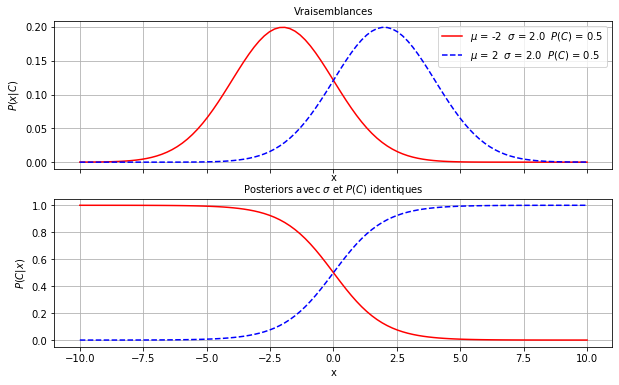

In [3]:
# Paramètres des deux distributions avec sigma et P(C) identiques 
mu    = [-2.0, 2.0] 
sigma = [2.0, 2.0]
pC    = [0.5, 0.5]

P = distributions(mu,sigma,pC,figsize=(10,6))


# Affichage des distributions (PDF) et les probabilités a posteriori
# SANS sauvegarde de la figure
# P.affiche_distributions('Posteriors avec $\sigma$ et $P(C)$ identiques', nom_fig=None)

# AVEC sauvegarde de la figure
nom = "Fig_14_29.svg"
P.affiche_distributions('Posteriors avec $\sigma$ et $P(C)$ identiques', nom_fig=nom)

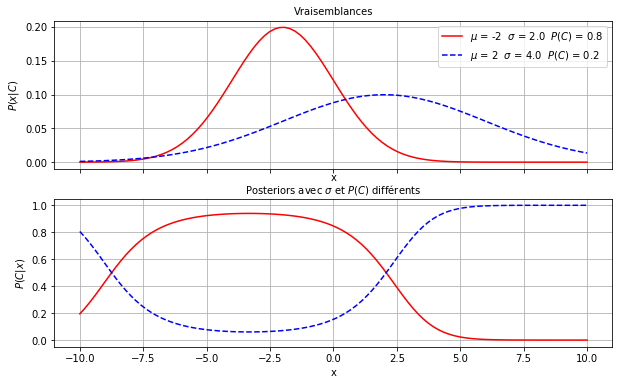

In [4]:
# Paramètres des deux distributions avec sigmas et P(C) différents 
mu    = [-2.0, 2.0] 
sigma = [2.0, 4.0]
pC    = [0.8, 0.2]

P = distributions(mu,sigma,pC,figsize=(10,6))

# Affiche distributions avec sauvegarde de la figure
nom = "Fig_15_29.svg"
P.affiche_distributions('Posteriors avec $\sigma$ et $P(C)$ différents', nom_fig=nom)